In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn import svm
import tensorflow as tf
import keras
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Model
from keras.utils import to_categorical
from prettytable import PrettyTable
tf.__version__


'2.0.0'

In [184]:
# import data
wine = pd.read_csv("wine.csv")

In [185]:
wine["y"] = np.where(wine["quality"] == "good", 1,0)

In [186]:
wine.drop("quality", axis = 1, inplace = True)

### EDA

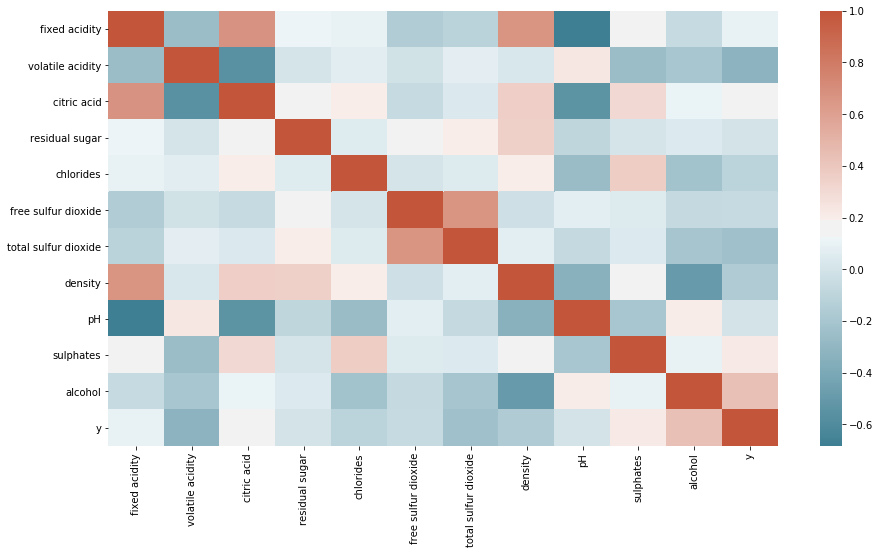

In [187]:
# cor plot
cor = wine.corr()
f, ax = plt.subplots(figsize = (15,8))
cmap = sns.diverging_palette(220,20, as_cmap = True)
sns.heatmap(cor, cmap = cmap)

In [188]:
# split into train and test data
train, test = train_test_split(wine, test_size = 0.1, random_state = 7)
train = train.reset_index()
test = test.reset_index()
train.drop("index", axis = 1, inplace = True)
test.drop("index", axis = 1, inplace = True)

### Logistic Regression

In [189]:
X_full_train = train.drop("y", axis = 1)
X_full_test = test.drop("y", axis = 1)

In [190]:
model1 = sm.Logit(train["y"], X_full_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.516626
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1439
Model:                          Logit   Df Residuals:                     1428
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.2534
Time:                        20:52:14   Log-Likelihood:                -743.42
converged:                       True   LL-Null:                       -995.78
Covariance Type:            nonrobust   LLR p-value:                4.331e-102
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0925      0.066      1.402      0.161      -0.037       0.222
volatile acidity        -3.2395      0.506     -6.406      0.000      -4.231      -2.248
citric acid             -1.1968      0.587     -2.037      0.042      -2.348      -0.045
residual sugar           0.0584      0.044      1.321      0.186      -0.028       0.145
chlorides               -4.1482      1.622     -2.557      0.011      -7.328      -0.969
free sulfur dioxide      0.0261      0.009      3.051      0.002       0.009       0.043
total sulfur dioxide    -0.0175      0.003     -5.765      0.000      -0.023      -0.012
density                 -6.4451      2.491     -2.587      0.010     -11.328      -1.562
pH                      -0.8118      0.633     -1.283      0.199      -2.052       0.428
sulphates                2.6796      0.457      5.864      0.000       1.784       3.575
alcohol                  0.9026      0.078     11.551      0.000       0.749       1.056
========================================================================================
"""

In [191]:
# make predictions on the train and the test sets and calculate accuracy
yhat_train = model1.predict(X_full_train)
yhat_test = model1.predict(X_full_test)
prediction_train = list(map(round,yhat_train))
prediction_test = list(map(round,yhat_test))
predictions_train = pd.concat([train["y"], pd.Series(prediction_train)], axis =1)
predictions_test = pd.concat([test["y"], pd.Series(prediction_test)], axis =1)
predictions_train.rename(columns = {0:"model1"}, inplace = True)
predictions_test.rename(columns = {0:"model1"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], predictions_train["model1"])}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], predictions_test["model1"])}')


The accuracy on the training set is 0.749131341209173
The accuracy on the test set is 0.73125


In [192]:
# try take out ph as it correlates strongly with other predictors
X_noph_train = X_full_train.drop("pH", axis = 1)
X_noph_test = X_full_test.drop("pH", axis=1)

In [193]:
# fit and predict
model2 = sm.Logit(train["y"], X_noph_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.517198
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1439
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.2526
Time:                        20:52:14   Log-Likelihood:                -744.25
converged:                       True   LL-Null:                       -995.78
Covariance Type:            nonrobust   LLR p-value:                1.265e-102
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1420      0.054      2.642      0.008       0.037       0.247
volatile acidity        -3.3245      0.502     -6.622      0.000      -4.308      -2.340
citric acid             -1.2122      0.587     -2.066      0.039      -2.362      -0.062
residual sugar           0.0588      0.044      1.333      0.183      -0.028       0.145
chlorides               -3.6230      1.564     -2.316      0.021      -6.689      -0.557
free sulfur dioxide      0.0246      0.008      2.892      0.004       0.008       0.041
total sulfur dioxide    -0.0167      0.003     -5.619      0.000      -0.023      -0.011
density                 -9.3811      1.012     -9.271      0.000     -11.364      -7.398
sulphates                2.6653      0.451      5.912      0.000       1.782       3.549
alcohol                  0.8856      0.077     11.534      0.000       0.735       1.036
========================================================================================
"""

In [194]:
# make predictions on the train and the test sets and calculate accuracy
yhat_train = model2.predict(X_noph_train)
yhat_test = model2.predict(X_noph_test)
prediction_train = list(map(round,yhat_train))
prediction_test = list(map(round,yhat_test))
predictions_train = pd.concat([predictions_train, pd.Series(prediction_train)], axis =1)
predictions_test = pd.concat([predictions_test, pd.Series(prediction_test)], axis =1)
predictions_train.rename(columns = {0:"model2"}, inplace = True)
predictions_test.rename(columns = {0:"model2"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], predictions_train["model2"])}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], predictions_test["model2"])}')

The accuracy on the training set is 0.7498262682418346
The accuracy on the test set is 0.73125


The baseline accuracy from logistic regression is 73%.

### Random Forest

In [195]:
# fit a normal random forests with 2000 trees
model3 = RandomForestClassifier(n_estimators = 2000)
model3.fit(X_full_train, train["y"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

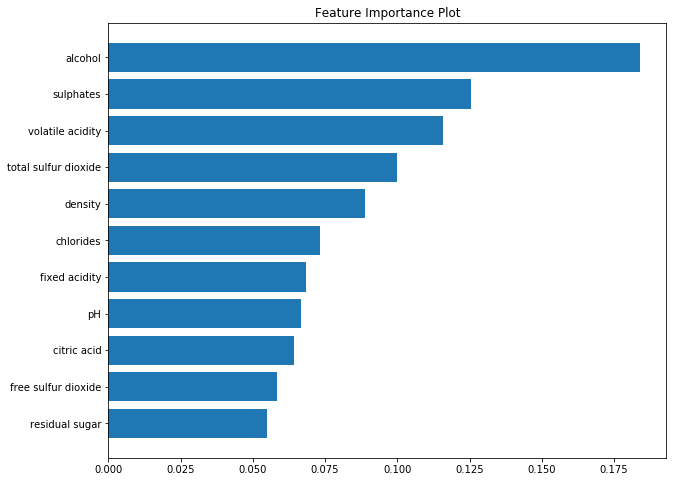

In [196]:
# plot feature importance
feature_importance = pd.concat([pd.Series(X_full_train.columns), pd.Series(model3.feature_importances_)], axis = 1).sort_values(by = 1)
f, ax = plt.subplots(figsize = (10,8))
ax.barh(feature_importance[0], feature_importance[1])
ax.set_title("Feature Importance Plot")
plt.show()


In [197]:
# make predictions on the train and the test sets and calculate accuracy
yhat_train = model3.predict(X_full_train)
yhat_test = model3.predict(X_full_test)
predictions_train = pd.concat([predictions_train, pd.Series(yhat_train)], axis =1)
predictions_test = pd.concat([predictions_test, pd.Series(yhat_test)], axis =1)
predictions_train.rename(columns = {0:"model3"}, inplace = True)
predictions_test.rename(columns = {0:"model3"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], predictions_train["model3"])}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], predictions_test["model3"])}')

The accuracy on the training set is 1.0
The accuracy on the test set is 0.83125


Let's try using GridCV to optimize our parameters.

In [198]:
# use GridSearch to find the best sets of parameters
parameters = {"max_features": ["sqrt", 5, 7, 9], "min_samples_leaf": [1, 2, 4, 6]}
gridsearch = GridSearchCV(RandomForestClassifier(n_estimators = 500), parameters, scoring = "accuracy")
grid_result = gridsearch.fit(X_full_train, train["y"])



In [199]:
print(f"The best score is {grid_result.best_score_} with {grid_result.best_params_}")

The best score is 0.8283512388695315 with {'max_features': 5, 'min_samples_leaf': 2}


Seems like the best model is the default one, and the test accuracy is around 85%.

### Gradient Boosted Trees

In [200]:
model4 = XGBClassifier(n_estimators = 2000, max_depth = 5, reg_alpha = 0.5)
model4.fit(X_full_train, train["y"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [201]:
# make predictions on the train and the test sets and calculate accuracy
yhat_train = model4.predict(X_full_train)
yhat_test = model4.predict(X_full_test)
predictions_train = pd.concat([predictions_train, pd.Series(yhat_train)], axis =1)
predictions_test = pd.concat([predictions_test, pd.Series(yhat_test)], axis =1)
predictions_train.rename(columns = {0:"model4"}, inplace = True)
predictions_test.rename(columns = {0:"model4"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], predictions_train["model4"])}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], predictions_test["model4"])}')

The accuracy on the training set is 1.0
The accuracy on the test set is 0.8


After tuning the parameters and trying out different values, the best model is with max_depth of 5 and L1 regularization with alpha = 0.5. The accuracy on test set is 80%.

### SVM

In [202]:
# try linear and gaussian kernel with different C
parameters = {"kernel": ["linear", "rbf"], "C": [0.1, 0.5, 1, 2, 4, 6, 8, 10,12]}
gridsearch = GridSearchCV(svm.SVC(), parameters, scoring = "accuracy")
grid_result = gridsearch.fit(X_full_train, train["y"])
print(f"The best score is {grid_result.best_score_} with {grid_result.best_params_}")


The best score is 0.7435782036391793 with {'C': 0.5, 'kernel': 'linear'}


In [203]:
# fit and predict
model5 = svm.SVC(kernel = "linear", C = 0.5)
model5.fit(X_full_train, train["y"])
yhat_train = model5.predict(X_full_train)
yhat_test = model5.predict(X_full_test)
predictions_train = pd.concat([predictions_train, pd.Series(yhat_train)], axis =1)
predictions_test = pd.concat([predictions_test, pd.Series(yhat_test)], axis =1)
predictions_train.rename(columns = {0:"model5"}, inplace = True)
predictions_test.rename(columns = {0:"model5"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], yhat_train)}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], yhat_test)}')

The accuracy on the training set is 0.7484364141765114
The accuracy on the test set is 0.725


The linear kernel somehow performs better than the gaussian kernel, but it's worse than our baseline.

### Neural Network

In [204]:
def model(input_shape):
    x_input = Input(input_shape)
    X = Dense(16, activation = "relu")(x_input)
    X = BatchNormalization()(X)
    X = Dense(32, activation = "relu")(X)
    X = BatchNormalization()(X)
    X = Dropout(rate = 0.1)(X)
    X = Dense(128, activation = "relu")(X)
    X = BatchNormalization()(X)
    X = Dropout(rate = 0.1)(X)
    X = Dense(2, activation = "sigmoid")(X)
    model = Model(inputs = x_input, outputs = X)
    
    return model
    
    
    

In [205]:
# convert X,y to numpy arrays
X_train_nn = X_full_train.to_numpy(dtype = "float32")
X_test_nn = X_full_test.to_numpy(dtype = "float32")
y_train_nn = train["y"].to_numpy(dtype = "float32")
y_test_nn = test["y"].to_numpy(dtype = "float32")

# change y to one-hot vectors
y_train_nn_onehot = to_categorical(y_train_nn, 2)
y_test_nn_onehot = to_categorical(y_test_nn, 2)


In [206]:
# initialize and compile
model6 = model(X_train_nn.shape[1:])
optimizer = tf.keras.optimizers.Adam(0.001)
model6.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics= ["accuracy"])

In [207]:
model6.fit(X_train_nn, y_train_nn_onehot, batch_size = 64, epochs = 300, validation_data = (X_test_nn, y_test_nn_onehot))

Train on 1439 samples, validate on 160 samples
Epoch 1/300
1439/1439 [==============================] - 1s 653us/step - loss: 0.7433 - accuracy: 0.5771 - val_loss: 0.7415 - val_accuracy: 0.4313
Epoch 2/300
1439/1439 [==============================] - 0s 80us/step - loss: 0.6473 - accuracy: 0.6557 - val_loss: 0.6696 - val_accuracy: 0.6281
Epoch 3/300
1439/1439 [==============================] - 0s 88us/step - loss: 0.6134 - accuracy: 0.6831 - val_loss: 0.6493 - val_accuracy: 0.6656
Epoch 4/300
1439/1439 [==============================] - 0s 58us/step - loss: 0.6236 - accuracy: 0.6574 - val_loss: 0.6331 - val_accuracy: 0.6812
Epoch 5/300
1439/1439 [==============================] - 0s 66us/step - loss: 0.6105 - accuracy: 0.6734 - val_loss: 0.6234 - val_accuracy: 0.6875
Epoch 6/300
1439/1439 [==============================] - 0s 51us/step - loss: 0.5873 - accuracy: 0.6942 - val_loss: 0.6127 - val_accuracy: 0.6844
Epoch 7/300
1439/1439 [==============================] - 0s 74us/step - loss

1439/1439 [==============================] - 0s 51us/step - loss: 0.5103 - accuracy: 0.7439 - val_loss: 0.6048 - val_accuracy: 0.6594
Epoch 57/300
1439/1439 [==============================] - 0s 54us/step - loss: 0.5110 - accuracy: 0.7484 - val_loss: 0.5307 - val_accuracy: 0.7188
Epoch 58/300
1439/1439 [==============================] - 0s 50us/step - loss: 0.5136 - accuracy: 0.7397 - val_loss: 0.5645 - val_accuracy: 0.6938
Epoch 59/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.5217 - accuracy: 0.7470 - val_loss: 0.5284 - val_accuracy: 0.7219
Epoch 60/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.5193 - accuracy: 0.7460 - val_loss: 0.5109 - val_accuracy: 0.7344
Epoch 61/300
1439/1439 [==============================] - 0s 55us/step - loss: 0.5136 - accuracy: 0.7460 - val_loss: 0.4954 - val_accuracy: 0.7531
Epoch 62/300
1439/1439 [==============================] - 0s 51us/step - loss: 0.5124 - accuracy: 0.7443 - val_loss: 0.4877 - val_a

Epoch 112/300
1439/1439 [==============================] - 0s 62us/step - loss: 0.4751 - accuracy: 0.7724 - val_loss: 0.5983 - val_accuracy: 0.6969
Epoch 113/300
1439/1439 [==============================] - 0s 57us/step - loss: 0.4885 - accuracy: 0.7613 - val_loss: 0.5335 - val_accuracy: 0.7281
Epoch 114/300
1439/1439 [==============================] - 0s 59us/step - loss: 0.4867 - accuracy: 0.7620 - val_loss: 0.5276 - val_accuracy: 0.7281
Epoch 115/300
1439/1439 [==============================] - 0s 57us/step - loss: 0.4866 - accuracy: 0.7669 - val_loss: 0.5027 - val_accuracy: 0.7437
Epoch 116/300
1439/1439 [==============================] - 0s 97us/step - loss: 0.4818 - accuracy: 0.7707 - val_loss: 0.5350 - val_accuracy: 0.7094
Epoch 117/300
1439/1439 [==============================] - 0s 51us/step - loss: 0.4825 - accuracy: 0.7710 - val_loss: 0.5230 - val_accuracy: 0.7031
Epoch 118/300
1439/1439 [==============================] - 0s 45us/step - loss: 0.4768 - accuracy: 0.7735 - val_

1439/1439 [==============================] - 0s 60us/step - loss: 0.4599 - accuracy: 0.7783 - val_loss: 0.5077 - val_accuracy: 0.7250
Epoch 168/300
1439/1439 [==============================] - 0s 61us/step - loss: 0.4701 - accuracy: 0.7821 - val_loss: 0.5487 - val_accuracy: 0.7250
Epoch 169/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.4656 - accuracy: 0.7787 - val_loss: 0.4640 - val_accuracy: 0.7906
Epoch 170/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.4623 - accuracy: 0.7755 - val_loss: 0.4739 - val_accuracy: 0.7563
Epoch 171/300
1439/1439 [==============================] - 0s 49us/step - loss: 0.4531 - accuracy: 0.7766 - val_loss: 0.4602 - val_accuracy: 0.7625
Epoch 172/300
1439/1439 [==============================] - 0s 53us/step - loss: 0.4588 - accuracy: 0.7787 - val_loss: 0.4947 - val_accuracy: 0.7594
Epoch 173/300
1439/1439 [==============================] - 0s 50us/step - loss: 0.4641 - accuracy: 0.7839 - val_loss: 0.4931 -

1439/1439 [==============================] - 0s 50us/step - loss: 0.4563 - accuracy: 0.7894 - val_loss: 0.4909 - val_accuracy: 0.7563
Epoch 223/300
1439/1439 [==============================] - 0s 49us/step - loss: 0.4506 - accuracy: 0.7818 - val_loss: 0.4720 - val_accuracy: 0.7750
Epoch 224/300
1439/1439 [==============================] - 0s 55us/step - loss: 0.4343 - accuracy: 0.8026 - val_loss: 0.5041 - val_accuracy: 0.7500
Epoch 225/300
1439/1439 [==============================] - 0s 49us/step - loss: 0.4414 - accuracy: 0.7814 - val_loss: 0.4933 - val_accuracy: 0.7469
Epoch 226/300
1439/1439 [==============================] - 0s 51us/step - loss: 0.4422 - accuracy: 0.7835 - val_loss: 0.4948 - val_accuracy: 0.7469
Epoch 227/300
1439/1439 [==============================] - 0s 52us/step - loss: 0.4528 - accuracy: 0.7887 - val_loss: 0.4797 - val_accuracy: 0.7688
Epoch 228/300
1439/1439 [==============================] - 0s 52us/step - loss: 0.4467 - accuracy: 0.7915 - val_loss: 0.4772 -

1439/1439 [==============================] - 0s 63us/step - loss: 0.4196 - accuracy: 0.8037 - val_loss: 0.4706 - val_accuracy: 0.7750
Epoch 278/300
1439/1439 [==============================] - 0s 53us/step - loss: 0.4206 - accuracy: 0.7978 - val_loss: 0.4782 - val_accuracy: 0.7563
Epoch 279/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.4340 - accuracy: 0.7818 - val_loss: 0.5051 - val_accuracy: 0.7531
Epoch 280/300
1439/1439 [==============================] - 0s 51us/step - loss: 0.4392 - accuracy: 0.7936 - val_loss: 0.4895 - val_accuracy: 0.7812
Epoch 281/300
1439/1439 [==============================] - 0s 65us/step - loss: 0.4149 - accuracy: 0.8002 - val_loss: 0.5245 - val_accuracy: 0.7437
Epoch 282/300
1439/1439 [==============================] - 0s 54us/step - loss: 0.4356 - accuracy: 0.7940 - val_loss: 0.5259 - val_accuracy: 0.7437
Epoch 283/300
1439/1439 [==============================] - 0s 48us/step - loss: 0.4140 - accuracy: 0.8127 - val_loss: 0.5249 -

After trying multiple architectures, it seems like NN can't get above 80%. The limited amount of data is likely the reason. The best performance is around 76%.

In [208]:
# append predictions
yhat_train = np.argmax(model6.predict(X_train_nn), axis = 1)
yhat_test = np.argmax(model6.predict(X_test_nn), axis = 1)
predictions_train = pd.concat([predictions_train, pd.Series(yhat_train)], axis = 1)
predictions_test = pd.concat([predictions_test, pd.Series(yhat_test)], axis = 1)
predictions_train.rename(columns = {0:"model6"}, inplace = True)
predictions_test.rename(columns = {0:"model6"}, inplace = True)
print(f'The accuracy on the training set is {accuracy_score(predictions_train["y"], yhat_train)}')
print(f'The accuracy on the test set is {accuracy_score(predictions_test["y"], yhat_test)}')

The accuracy on the training set is 0.8297428769979153
The accuracy on the test set is 0.75


In [209]:
predictions_test

,y,model1,model2,model3,model4,model5,model6
0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
155,0,0,0,0,1,0,0
156,0,0,0,0,0,0,0
157,1,0,0,0,0,0,0
158,0,1,1,1,0,0,0


In [210]:
# export test result 
predictions_test.drop("y", axis = 1, inplace = True)
result = pd.concat([test, predictions_test], axis = 1)
result.rename(columns = {"model1": "Logistic Regression", "model3": "Random Forest", 
                              "model4": "Gradient Boosted Trees", "model5": "SVM", "model6": "Neural Net"}, inplace = True)
result.drop("model2", axis = 1, inplace= True)


In [211]:
result.to_csv("test_result.csv")

In [212]:
# generate a nice table showing the accuracy of different models
table = PrettyTable()
table.field_names = ["Method", "Accuracy"]
table.add_row(["Logistic Regression", round(accuracy_score(result["y"], result["Logistic Regression"]),2)])
table.add_row(["Random Forest", round(accuracy_score(result["y"], result["Random Forest"]),2)])
table.add_row(["Boosted Trees", round(accuracy_score(result["y"], result["Gradient Boosted Trees"]),2)])
table.add_row(["SVM", round(accuracy_score(result["y"], result["SVM"]),2)])
table.add_row(["Neural Network", round(accuracy_score(result["y"], result["Neural Net"]),2)])

In [213]:
print(table)

+---------------------+----------+
|        Method       | Accuracy |
+---------------------+----------+
| Logistic Regression |   0.73   |
|    Random Forest    |   0.83   |
|    Boosted Trees    |   0.8    |
|         SVM         |   0.72   |
|    Neural Network   |   0.75   |
+---------------------+----------+
